# Expectation

#### The expected value of a random variable is indeed a weighted average of all possible values that the variable can take, with each value being weighted by its probability of occurrence.

In [1]:
outcomes = [1, 2, 3, 4, 5, 6]
probabilities = [1/6] * 6

expected_value = sum(outcome * probability for outcome, probability in zip(outcomes, probabilities))
print(f"Expected Value for rolling a fair six-sided die: {expected_value}")


Expected Value for rolling a fair six-sided die: 3.5


In [2]:
outcomes = [0, 1, 2, 3]
probabilities = [0.1, 0.2, 0.3, 0.4]

expected_value = sum(outcome * probability for outcome, probability in zip(outcomes, probabilities))
print(f"Expected Value for custom discrete distribution: {expected_value}")


Expected Value for custom discrete distribution: 2.0


In [3]:
import numpy as np
from scipy.integrate import quad

lambda_param = 1

def exponential_pdf(x):
    return lambda_param * np.exp(-lambda_param * x)

def integrand(x):
    return x * exponential_pdf(x)

result, _ = quad(integrand, 0, np.inf)
print(f"Expected Value for the exponential distribution: {result}")

Expected Value for the exponential distribution: 0.9999999999999998


## Negative Binomial Distribution 

#### The negative binomial distribution is a probability distribution that models the number of trials needed to achieve a specified number of successes in a sequence of independent and identically distributed Bernoulli trials. This distribution extends the geometric distribution, which only counts the number of trials until the first success.

- X is the number of failures that occur
- k is a specific number of failures
- r is the number of successes required
- p is the probability of success on each trial

- P(X = k) = (
-             k + r -1
              r-1      )  p^r(1-p)^k

#### Scenarios

- Quality Control: Determining the number of products that need to be tested before a certain number of defective items are found.
- Estimating the number of risky events (like loan defaults or company bankruptcies) before reaching a financial threshold that triggers a response or policy change.

P(X = 0) = 0.1250
P(X = 1) = 0.1875
P(X = 2) = 0.1875
P(X = 3) = 0.1562
P(X = 4) = 0.1172
P(X = 5) = 0.0820
P(X = 6) = 0.0547
P(X = 7) = 0.0352
P(X = 8) = 0.0220
P(X = 9) = 0.0134
P(X = 10) = 0.0081
P(X = 11) = 0.0048
P(X = 12) = 0.0028
P(X = 13) = 0.0016
P(X = 14) = 0.0009
P(X = 15) = 0.0005
P(X = 16) = 0.0003
P(X = 17) = 0.0002
P(X = 18) = 0.0001
P(X = 19) = 0.0001


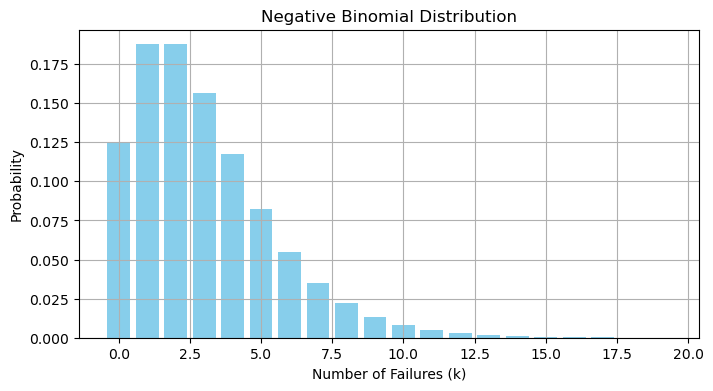

In [4]:
import numpy as np
from scipy.stats import nbinom
import matplotlib.pyplot as plt

# Parameters
r = 3  # Number of successes
p = 0.5  # Probability of success in each trial

# Values of k to calculate probabilities for
k_values = np.arange(0, 20)  # Array of k values from 0 to 19

# Calculate probabilities using the negative binomial distribution
probabilities = nbinom.pmf(k_values, r, p)

# Print the probabilities for each k
for k, prob in zip(k_values, probabilities):
    print(f"P(X = {k}) = {prob:.4f}")

# Plotting the distribution
plt.figure(figsize=(8, 4))
plt.bar(k_values, probabilities, color='skyblue')
plt.title('Negative Binomial Distribution')
plt.xlabel('Number of Failures (k)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


## Survival Function
#### The survival function, denoted as S(t), represents the probability that a certain event (e.g., death, failure) has not occurred by a certain time t. Mathematically, it is defined as:
- S(t) = P(T > t)
- Where T is a random variable representing the time until the event occurs.

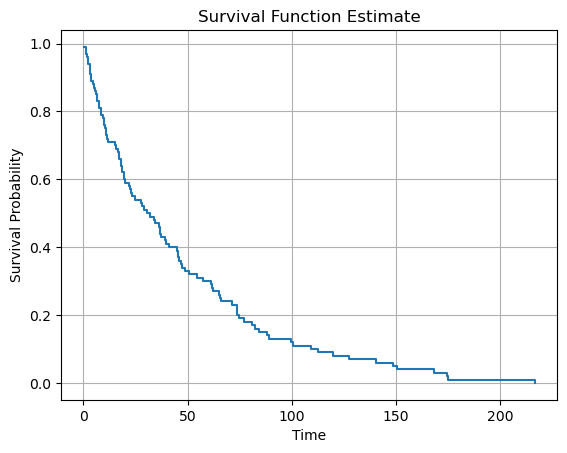

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon  # Exponential distribution for survival times

# Generate survival data
np.random.seed(42)
size = 100
scale = 50  # mean survival time

# Generate survival times from an exponential distribution
survival_times = expon.rvs(scale=scale, size=size)

# Sort the survival times for cumulative calculation
sorted_times = np.sort(survival_times)

# Compute survival probabilities
survival_probabilities = 1. - np.arange(1, size + 1) / size

# Plotting the survival function
plt.step(sorted_times, survival_probabilities, where="post")
plt.title('Survival Function Estimate')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()


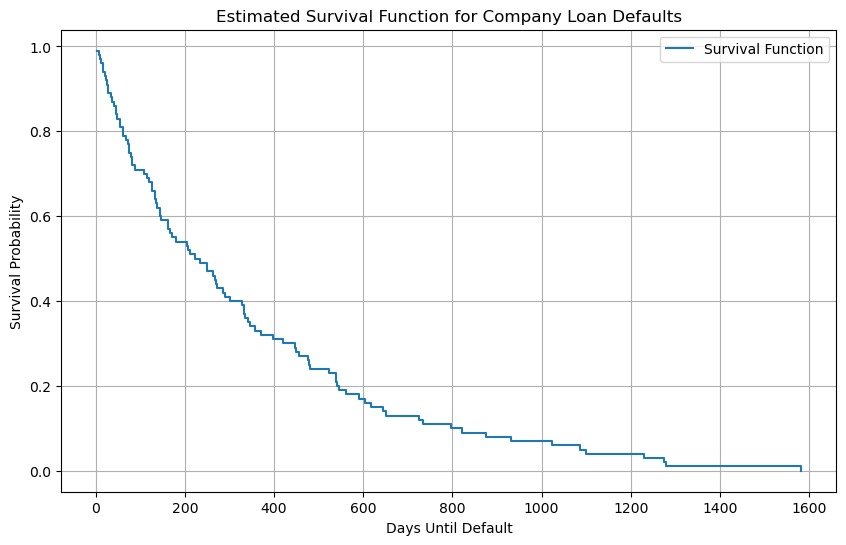

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Setting random seed for reproducibility
np.random.seed(42)

# Simulated loan survival data parameters
size = 100  # number of companies
scale = 365  # average days until default (1 year)

# Generate survival times (time until loan default) for the companies
survival_times = expon.rvs(scale=scale, size=size)

# Sort the survival times to calculate the survival function
sorted_times = np.sort(survival_times)

# Calculate survival probabilities
survival_probabilities = 1. - np.arange(1, size + 1) / size

# Plotting the survival function
plt.figure(figsize=(10, 6))
plt.step(sorted_times, survival_probabilities, where="post", label='Survival Function')
plt.title('Estimated Survival Function for Company Loan Defaults')
plt.xlabel('Days Until Default')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend()
plt.show()



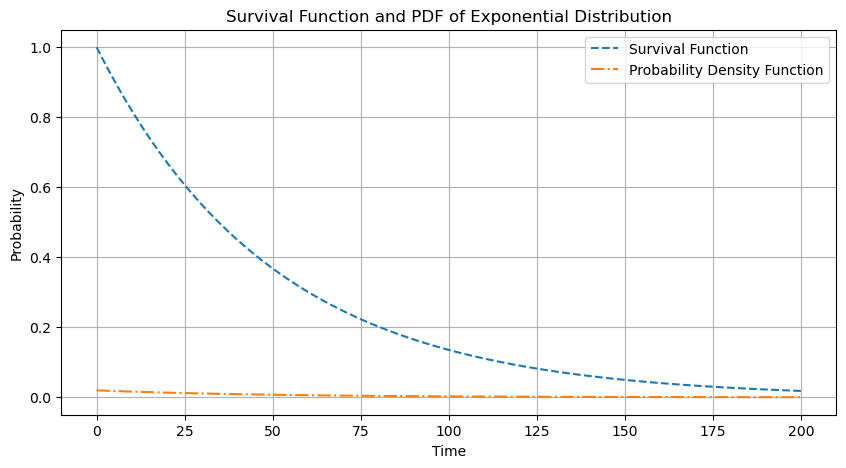

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
scale = 50  # Mean time to event

# Define time points to evaluate functions
time_points = np.linspace(0, 200, 400)

# Compute the survival function
survival_function = np.exp(-time_points / scale)

# Compute the PDF
pdf = expon.pdf(time_points, scale=scale)

# Plotting both functions
plt.figure(figsize=(10, 5))
plt.plot(time_points, survival_function, label='Survival Function', linestyle='--')
plt.plot(time_points, pdf, label='Probability Density Function', linestyle='-.')
plt.title('Survival Function and PDF of Exponential Distribution')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


## Example 4.4.5

#### (Distinct birthdays, birthday matches). In a group of n people, under the usual assumptions about birthdays, what is the expected number of distinct birthdays among the n people, i.e., the expected number of days on which at least one of the people was born? What is the expected number of birthday matches, i.e., pairs of people with the same birthday?